<a href="https://colab.research.google.com/github/MananPoojara/MananPoojara/blob/main/pr12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving studentporcsv__2024_10_16_07_51_52.csv to studentporcsv__2024_10_16_07_51_52 (4).csv
Dataset preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[

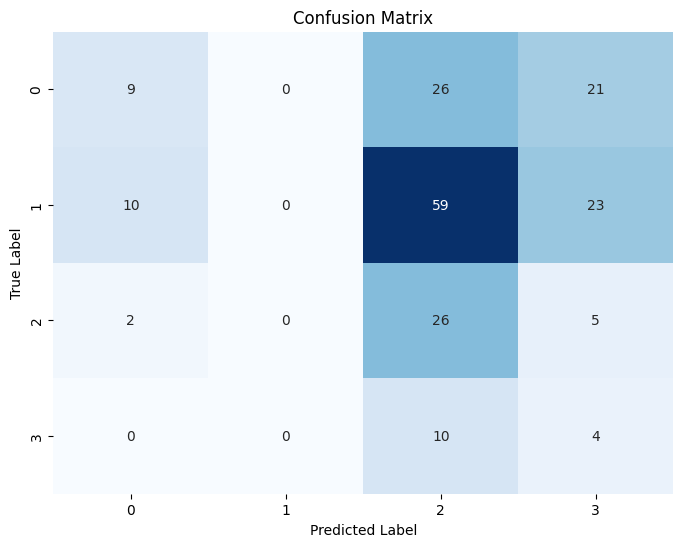

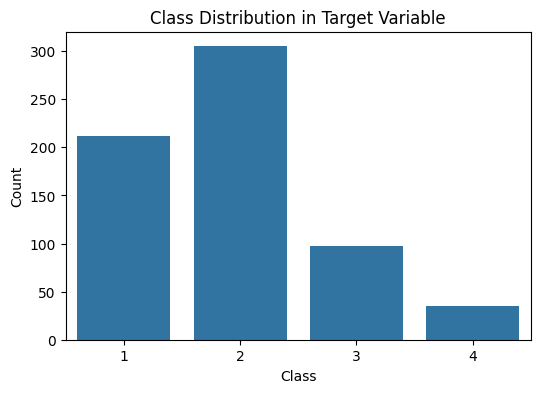

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


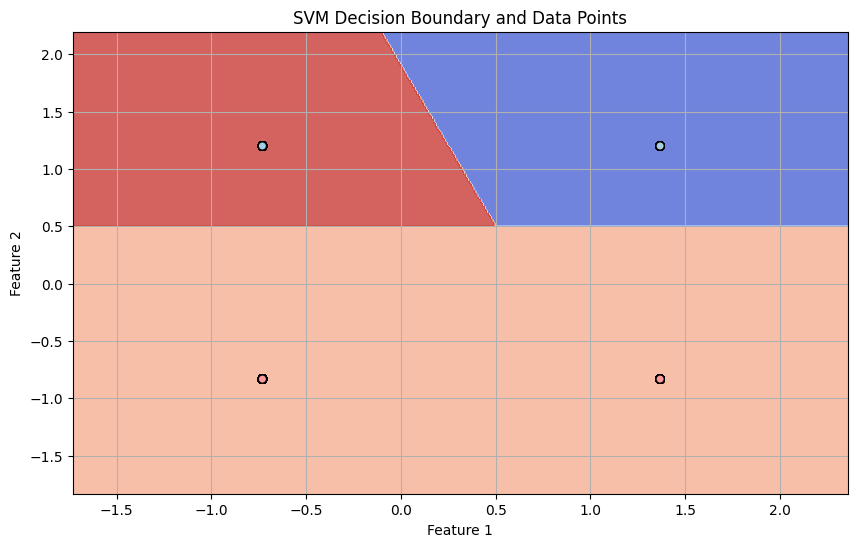

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()  # This will allow you to upload a file in Google Colab

# Step 2: Load the uploaded CSV file into a DataFrame
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Step 3: Preprocess the data
if 'target' not in data.columns:
    print("Please make sure your dataset has a column named 'target'")
else:
    X = data.drop('target', axis=1)  # Features
    y = data['target']  # Target label

    # Convert categorical features to numerical using Label Encoding
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

    # Use the first two numerical features for visualization
    if X.shape[1] < 2:
        print("Need at least two numerical features for visualization.")
    else:
        X = X.iloc[:, :2]  # Take only the first two features for 2D visualization

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 5: Initialize the Support Vector Classifier with balanced class weights
    svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

    # Step 6: Train the model
    svm_model.fit(X_train, y_train)

    # Step 7: Predict the target on the test set
    y_pred = svm_model.predict(X_test)

    # Step 8: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM Model: {accuracy:.2f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

    # Step 9: Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Optional: Display class distribution in the target variable
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title("Class Distribution in Target Variable")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

    # Step 10: Visualization of SVM Decision Boundary
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class using the trained model on the grid
    Z = svm_model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))  # Scale the grid points
    Z = Z.reshape(xx.shape)  # Reshape back into the grid format

    # Plotting the decision boundary
    # Plotting the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Plot decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='Paired')  # Plot data points
    plt.title("SVM Decision Boundary and Data Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.grid()
    plt.show()

